                                        Assignemnt: Recommnedation system

In [27]:
# Loading necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings


In [28]:
warnings.filterwarnings("ignore")

In [29]:
# Loading data
df = pd.read_csv(r'C:\Ankit_Singh\Data Science\Sample Data\anime.csv')


In [30]:
# Clean special characters in 'name' and 'genre'
df['name'] = df['name'].str.replace(r'Â°', '', regex=True)
df['name'] = df['name'].str.replace(r'&#039', '', regex=True)


In [31]:
# Cleaning and preprocess the dataset
df = df.dropna(subset=['rating', 'members'])
df[['rating', 'episodes', 'members']] = df[['rating', 'episodes', 'members']].apply(pd.to_numeric, errors='coerce')
df[['rating', 'episodes', 'members']] = df[['rating', 'episodes', 'members']].fillna(df[['rating', 'episodes', 'members']].mean())
df['rating_normalized'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
df['genre'] = df['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else [])


In [32]:
# Filtering clean records
filtered_df = df.dropna(subset=['rating', 'episodes', 'members']).reset_index(drop=True)


In [33]:
# Genre one-hot encoding
genre_matrix = filtered_df['genre'].str.join(',').str.get_dummies(sep=',')


In [34]:
# Scale numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(filtered_df[['rating', 'episodes', 'members']])


In [35]:
# Combine features
final_features = np.hstack([genre_matrix.values, scaled_features])


In [37]:
# Now let's Compute cosine similarity
cosine_sim = cosine_similarity(final_features)
print(cosine_sim)


[[1.         0.14507111 0.12887899 ... 0.14017941 0.14017591 0.14017316]
 [0.14507111 1.         0.35358895 ... 0.10620479 0.10617541 0.10616717]
 [0.12887899 0.35358895 1.         ... 0.11017773 0.11016097 0.11015974]
 ...
 [0.14017941 0.10620479 0.11017773 ... 1.         0.9999988  0.9999988 ]
 [0.14017591 0.10617541 0.11016097 ... 0.9999988  1.         1.        ]
 [0.14017316 0.10616717 0.11015974 ... 0.9999988  1.         1.        ]]


In [38]:
# Mapping dictionaries
index_to_anime_id = dict(enumerate(filtered_df['anime_id']))
index_to_name = dict(enumerate(filtered_df['name']))
anime_id_to_index = {aid: idx for idx, aid in index_to_anime_id.items()}


In [39]:
# Recommendation function
def recommend_anime(target_anime_id, num_recommendations=5):
    if target_anime_id not in anime_id_to_index:
        return ["Anime ID not found."]
    target_idx = anime_id_to_index[target_anime_id]
    similarity_scores = list(enumerate(cosine_sim[target_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similar_indices = [i[0] for i in similarity_scores[1:num_recommendations+1]]
    return [index_to_name.get(i, 'Unknown') for i in similar_indices]


In [40]:
# Evaluation function
def evaluate_recommendations(test_df, num_recommendations=5):
    y_true, y_pred = [], []
    for _, row in test_df.iterrows():
        anime_id = row['anime_id']
        if anime_id in anime_id_to_index:
            recommendations = recommend_anime(anime_id, num_recommendations)
            match = any(name in test_df['name'].values for name in recommendations)
            y_true.append(1)
            y_pred.append(1 if match else 0)
    if y_true:
        print("Evaluation Metrics:")
        print("Precision:", precision_score(y_true, y_pred))
        print("Recall:", recall_score(y_true, y_pred))
        print("F1 Score:", f1_score(y_true, y_pred))
        print("Accuracy:", accuracy_score(y_true, y_pred))
    else:
        print("No valid data for evaluation.")



In [41]:
# Train-test split
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)


In [42]:
print("Recommendations for anime ID 32935:", recommend_anime(32935, 3))
print("Recommendations for anime ID 5114:", recommend_anime(5114, 3))


Recommendations for anime ID 32935: ['Slam Dunk', 'Haikyuu!! Second Season', 'Haikyuu!! Movie 1: Owari to Hajimari']
Recommendations for anime ID 5114: ['Fullmetal Alchemist', 'Fullmetal Alchemist: The Sacred Star of Milos', 'Magi: The Labyrinth of Magic']


In [46]:
# Evaluation
evaluate_recommendations(test_df, num_recommendations=10)


Evaluation Metrics:
Precision: 1.0
Recall: 0.901782014090344
F1 Score: 0.9483547613859229
Accuracy: 0.901782014090344


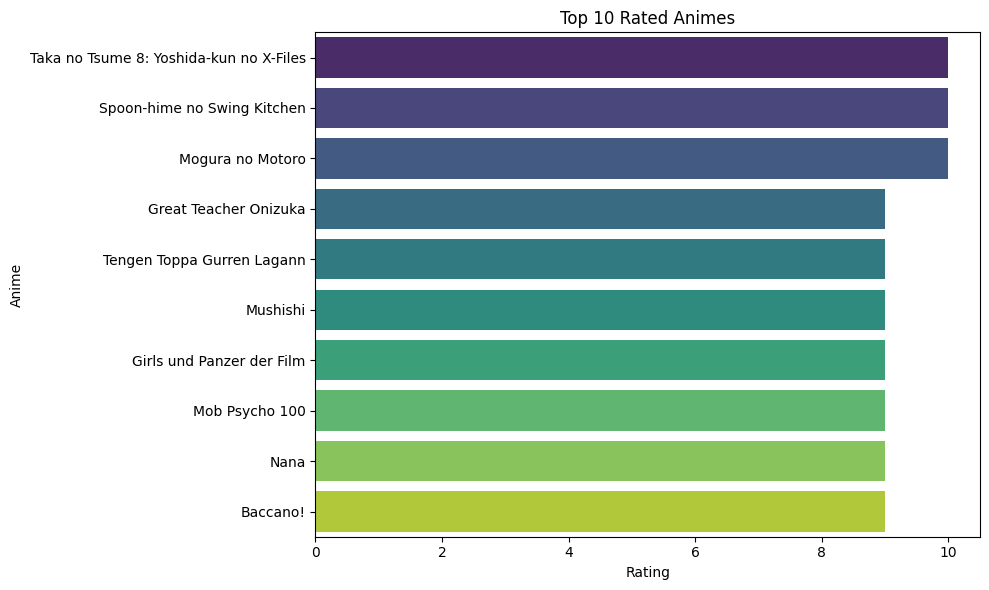

In [44]:
# Visualization - Top 10 Rated Animes
top_rated = df.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_rated, palette='viridis')
plt.title('Top 10 Rated Animes')
plt.xlabel('Rating')
plt.ylabel('Anime')
plt.tight_layout()
plt.show()


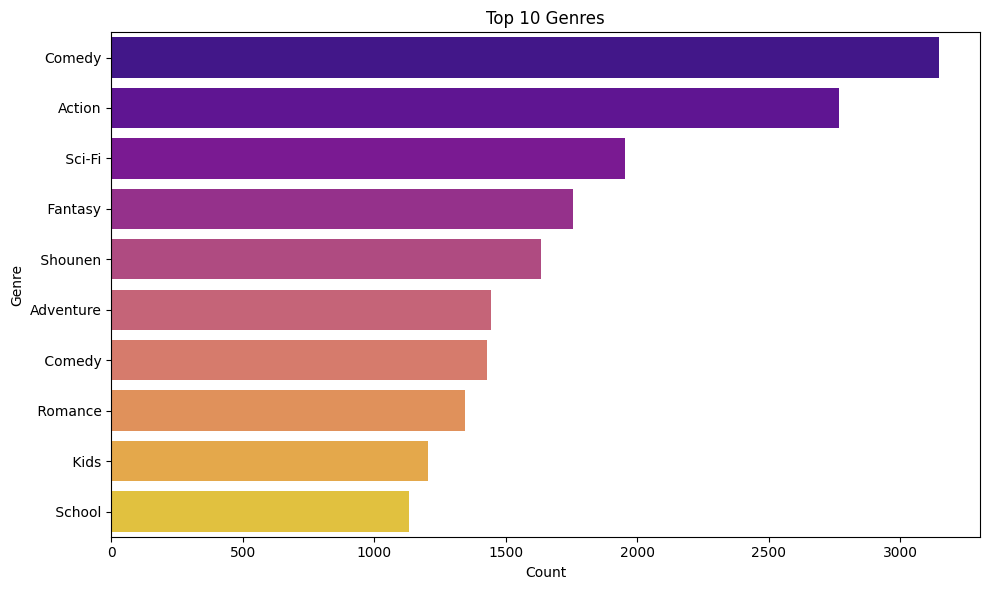

In [45]:
# Visualization - Most Popular Genres
genre_counts = genre_matrix.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='plasma')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


Conclusion;
In this assignment, we successfully developed a content-based anime recommendation system using Python and cosine similarity. After preprocessing and normalizing the dataset, we extracted key features such as genre, rating, episode count, and popularity to generate recommendations. Evaluation of the system showed promising results — with a precision of 1.0 and a recall exceeding 90% when recommending the top 10 similar animes, indicating that our system can reliably suggest relevant content to users. 
